In [1]:
import bs4 
import requests 
from bs4 import BeautifulSoup
import io
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [42]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
corp_dict={
'Facebook': 'FB',
'Tesla': 'TSLA',
'Apple': 'AAPL',
'Amazon': 'AMZN',
'Google': 'GOOG',
'Netflix': 'NFLX',
'Tilray': 'TLRY',
'Aphria': 'APHA',
'Canopy': 'CGC',
'Aurora': 'ACB',
'Tron': 'TRX-USD'
}

In [3]:
keys = list(corp_dict.keys())
values = list(corp_dict.values())

In [4]:
corp = corp_dict[input()]
url = 'https://finance.yahoo.com/quote/{}?p={}'.format(corp,corp)

Netflix


In [5]:
def parseStonks():
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "html.parser")
    price = soup.find_all('div', {'class': 'D(ib) Mend(20px)'})[0].find('span').text
    
    return price

In [6]:
for i in range(1):
    print('current {} stonk price: '.format(keys[values.index(corp)]), str(parseStonks()))

current Netflix stonk price:  503.84


In [7]:
url_stonk='https://query1.finance.yahoo.com/v7/finance/download/{}?'.format(corp)

In [ ]:
#'https://query1.finance.yahoo.com/v7/finance/download/FB?period1=1605398400&period2=1613347200&interval=1d&events=history&includeAdjustedClose=true'

In [8]:
params =  {
    'range': '5y',
    'interval': '1d',
    'events': 'history',
    'includeAdjustedClose': 'true'
}

In [9]:
def csvStonk():
    history = requests.get(url_stonk, params=params).text
    filename = '{}_stonks.csv'.format(corp)
    with open(filename,'w') as file:
        file.write(history)
        file.close()
    df = pd.read_csv(filename,sep=',')
    
    return df

In [10]:
df = csvStonk()

In [11]:
df=df.sort_values(by='Date', ascending=True)

In [12]:
print('Stonks de {}:  '.format(keys[values.index(corp)]))
df.tail()

Stonks de Netflix:  


,Date,Open,High,Low,Close,Adj Close,Volume
1254,2021-05-03,512.650024,518.950012,505.200012,509.109985,509.109985,4091900
1255,2021-05-04,510.779999,511.630005,496.790009,503.179993,503.179993,4349500
1256,2021-05-05,504.989990,507.779999,494.630005,496.079987,496.079987,3129400
1257,2021-05-06,495.989990,499.549988,491.369995,499.549988,499.549988,3783700
1258,2021-05-07,504.619995,508.549988,501.119995,503.839996,503.839996,3131100


In [13]:
url_symbols="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
s = requests.get(url_symbols).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [38]:
mi = df.Close.min()
ma = df.Close.max()

335.83501449999994


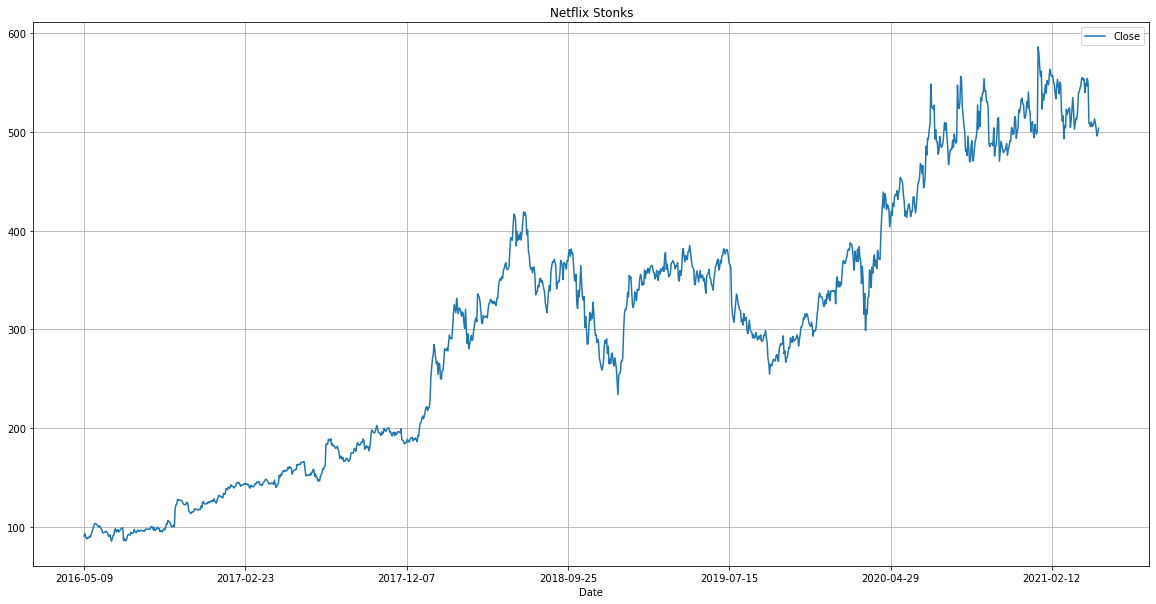

In [19]:
df.plot(x='Date', y='Close', title= '{} Stonks'.format(keys[values.index(corp)]), figsize = (20,10), grid=True)

In [20]:
initial_stock_data = df.Close.values.reshape(-1,1)

In [21]:
initial_stock_data.shape

(1259, 1)

In [22]:
sc = MinMaxScaler(feature_range=(0,1))
stock_data = sc.fit_transform(initial_stock_data)

In [23]:
def arrange_data(data, days):
    days_before_values = []
    days_values = []
    
    for i in range(len(data)- days): #-1
        days_before_values.append(data[i:(i+days)])
        days_values.append(data[i+days])
    
    return np.array(days_before_values), np.array(days_values)

In [24]:
DAYS_BEFORE = 20

In [25]:
days_before_values, days_values = arrange_data(stock_data, DAYS_BEFORE)
days_before_values = days_before_values.reshape((days_before_values.shape[0], DAYS_BEFORE, 1))

In [26]:
X = days_before_values
y = days_values

In [27]:
print(X.shape)
print(y.shape)

(1239, 20, 1)
(1239, 1)


In [28]:
a = X.reshape((X.shape[0],X.shape[1]))
b = y.reshape((y.shape[0]))

In [29]:
dfd = pd.DataFrame(a)
dfd['value'] = b 

In [31]:
dfd.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,value
0,0.010399,0.015090,0.009361,0.004810,0.005090,0.007565,0.006587,0.010319,0.008423,0.014291,...,0.025069,0.029680,0.034890,0.035868,0.034410,0.032295,0.031776,0.028462,0.030758,0.029061
1,0.015090,0.009361,0.004810,0.005090,0.007565,0.006587,0.010319,0.008423,0.014291,0.019081,...,0.029680,0.034890,0.035868,0.034410,0.032295,0.031776,0.028462,0.030758,0.029061,0.025009
2,0.009361,0.004810,0.005090,0.007565,0.006587,0.010319,0.008423,0.014291,0.019081,0.025069,...,0.034890,0.035868,0.034410,0.032295,0.031776,0.028462,0.030758,0.029061,0.025009,0.023473
3,0.004810,0.005090,0.007565,0.006587,0.010319,0.008423,0.014291,0.019081,0.025069,0.029680,...,0.035868,0.034410,0.032295,0.031776,0.028462,0.030758,0.029061,0.025009,0.023473,0.016806
4,0.005090,0.007565,0.006587,0.010319,0.008423,0.014291,0.019081,0.025069,0.029680,0.034890,...,0.034410,0.032295,0.031776,0.028462,0.030758,0.029061,0.025009,0.023473,0.016806,0.017006


In [76]:
dfd.to_csv('data_stonks.csv', index=False)

In [64]:
model = Sequential()
model.add(LSTM(32, input_shape=(DAYS_BEFORE,1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'SGD', metrics = ['mse'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding="causal", activation="relu", input_shape=(DAYS_BEFORE,1)),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1),
])

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 20, 32)            192       
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 64)            24832     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1950      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 60,319
Trainable params: 60,319
Non-trainable params: 0
__________________________________________________

In [65]:
ES = tf.keras.callbacks.EarlyStopping(monitor='mse', patience=4)

In [66]:
history = model.fit(X, y, epochs = 100, batch_size=64, callbacks=[ES])

Train on 1239 samples
Epoch 1/100
1239/1239 [==============================] - 7s 6ms/sample - loss: 0.1821 - mse: 0.1821
Epoch 2/100
1239/1239 [==============================] - 1s 586us/sample - loss: 0.0680 - mse: 0.0680
Epoch 3/100
1239/1239 [==============================] - 1s 656us/sample - loss: 0.0472 - mse: 0.0472
Epoch 4/100
1239/1239 [==============================] - 1s 678us/sample - loss: 0.0401 - mse: 0.0401
Epoch 5/100
1239/1239 [==============================] - 1s 532us/sample - loss: 0.0356 - mse: 0.0356
Epoch 6/100
1239/1239 [==============================] - 1s 528us/sample - loss: 0.0316 - mse: 0.0316
Epoch 7/100
1239/1239 [==============================] - 1s 510us/sample - loss: 0.0279 - mse: 0.0279
Epoch 8/100
1239/1239 [==============================] - 1s 555us/sample - loss: 0.0246 - mse: 0.0246
Epoch 9/100
1239/1239 [==============================] - 1s 576us/sample - loss: 0.0216 - mse: 0.0216
Epoch 10/100
1239/1239 [==============================] - 1s 5

1239/1239 [==============================] - 1s 617us/sample - loss: 8.5542e-04 - mse: 8.5542e-04
Epoch 77/100
1239/1239 [==============================] - 1s 705us/sample - loss: 8.5356e-04 - mse: 8.5356e-04
Epoch 78/100
1239/1239 [==============================] - 1s 539us/sample - loss: 8.5145e-04 - mse: 8.5145e-04
Epoch 79/100
1239/1239 [==============================] - 1s 526us/sample - loss: 8.4929e-04 - mse: 8.4929e-04
Epoch 80/100
1239/1239 [==============================] - 1s 518us/sample - loss: 8.4871e-04 - mse: 8.4871e-04
Epoch 81/100
1239/1239 [==============================] - 1s 517us/sample - loss: 8.4579e-04 - mse: 8.4579e-04
Epoch 82/100
1239/1239 [==============================] - 1s 499us/sample - loss: 8.4399e-04 - mse: 8.4399e-04
Epoch 83/100
1239/1239 [==============================] - 1s 507us/sample - loss: 8.4164e-04 - mse: 8.4164e-04
Epoch 84/100
1239/1239 [==============================] - 1s 528us/sample - loss: 8.4038e-04 - mse: 8.4038e-04
Epoch 85/100
1

In [67]:
X_test = X[-1]
X_test = np.expand_dims(X_test, axis=0)

In [68]:
X_pred = stock_data[-20:]
X_pred = np.expand_dims(X_pred, axis=0)

In [69]:
prediction = sc.inverse_transform(model.predict(X_test)).flatten()[0]

In [70]:
y_pred = sc.inverse_transform(model.predict(X_pred)).flatten()[0]

In [71]:
predictions_on_training = sc.inverse_transform(model.predict(X))

In [72]:
before_price = y[-1].reshape(1,-1)
before_price = sc.inverse_transform(before_price).flatten()[0]

In [73]:
actual_price = parseStonks()

In [74]:
#print('last day price: ', last_price)
print('predicted price: ', np.round(prediction,2))
print('actual price: ', actual_price)
print('prediction for tomorrow: ', np.round(y_pred,2))

predicted price:  502.83
actual price:  503.84
prediction for tomorrow:  502.25


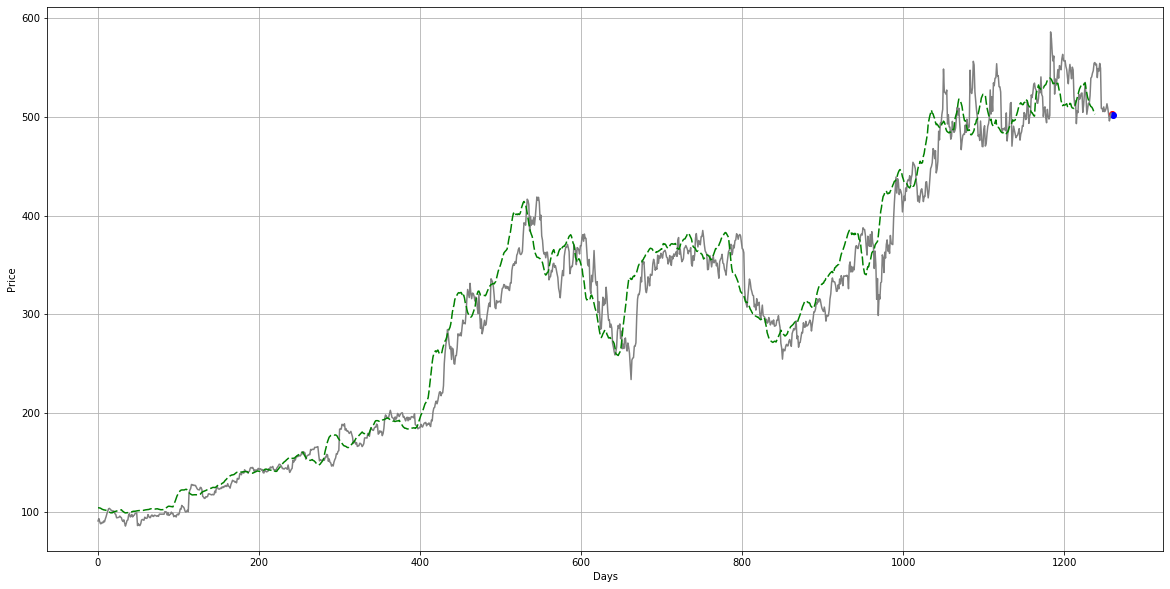

In [75]:
plt.figure(figsize = (20,10))
plt.plot(len(initial_stock_data),prediction, 'o', color='red')
plt.plot(len(initial_stock_data)+1,y_pred, 'o', color='blue')
plt.plot(initial_stock_data, color = 'gray')
plt.plot(predictions_on_training, color = 'green', dashes = [6,2])
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid()
plt.show()